<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

**Random Adjacency Matrix**

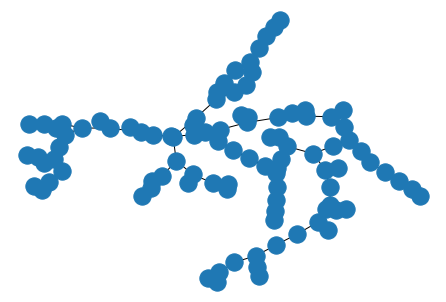

In [ ]:
G = nx.random_tree(100)
nx.draw(G)
plt.show()

In [ ]:
adj = nx.adjacency_matrix(G).toarray()
adj

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
np.where(adj==1)

(array([ 0,  0,  1,  1,  2,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,  7,  7,
         7,  8,  8,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14,
        15, 16, 16, 17, 18, 19, 20, 20, 20, 21, 22, 22, 23, 23, 24, 24, 25,
        25, 26, 26, 26, 27, 27, 28, 29, 30, 30, 31, 31, 31, 32, 33, 33, 33,
        33, 34, 34, 34, 35, 36, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 41,
        42, 42, 43, 44, 45, 45, 46, 46, 47, 47, 47, 48, 48, 49, 49, 50, 51,
        51, 51, 51, 52, 53, 53, 53, 53, 54, 54, 55, 56, 56, 57, 58, 59, 59,
        60, 60, 61, 61, 62, 63, 63, 64, 65, 65, 66, 66, 67, 67, 67, 68, 68,
        68, 69, 69, 69, 70, 70, 70, 71, 72, 72, 73, 74, 74, 74, 75, 76, 76,
        76, 77, 78, 79, 80, 80, 81, 81, 82, 82, 82, 83, 83, 84, 84, 84, 85,
        85, 85, 86, 86, 87, 88, 88, 89, 89, 89, 90, 90, 90, 90, 91, 92, 92,
        92, 93, 94, 94, 94, 95, 96, 97, 98, 98, 99]),
 array([39, 67, 66, 98, 74, 19, 39, 14, 54, 21, 27, 65, 81, 18, 54, 27, 31,
        51, 23, 38, 77, 26, 88, 53

**Adjacency List**

In [ ]:
class Node: 
  
  def __init__(self): 
    self.graph = defaultdict(list) 


  def add_edge(self, u, v): 
    self.graph[u].append(v) 


  def DFS_Marking(self, v, dfs_marked, dfs_result): 
    dfs_marked[v] = True
    dfs_result.append(v) 
    for i in self.graph[v]: 
      if dfs_marked[i] == False: 
        self.DFS_Marking(i, dfs_marked, dfs_result)
    return dfs_result 


  def DFS(self, v):
    dfs_result = [] 
    dfs_marked = [False] * (max(self.graph)+1) 
    return self.DFS_Marking(v, dfs_marked, dfs_result)


  def BFS(self, s):
    bfs_result = [] 
    bfs_marked = [False] * (len(self.graph)) 
    queue = [] 
    queue.append(s) 
    bfs_marked[s] = True
    while queue: 
      s = queue.pop(0) 
      bfs_result.append(s)
      for i in self.graph[s]: 
        if bfs_marked[i] == False: 
          queue.append(i) 
          bfs_marked[i] = True 
    return bfs_result


  def calc_distance(self, s, d, s_method):
    path = self.BFS(s) if s_method == "BFS" else self.DFS(s)
    try:
      distance = path.index(d)
      ret_path = path[:distance+1]
    except ValueError:
      ret_path = "No Path Found!"
      distance = "N/A"
    return distance, ret_path

In [ ]:
g = Node()
for i in range(100):
  for j in range(100):
    if adj[i][j] == 1:
      g.add_edge(i, j)

In [ ]:
print(str(g.BFS(68)))

[68, 20, 51, 91, 40, 74, 7, 43, 63, 30, 2, 10, 27, 31, 83, 71, 53, 5, 34, 82, 61, 25, 35, 45, 21, 65, 81, 29, 94, 42, 97, 72, 92, 32, 60, 55, 62, 93, 58, 90, 41, 87, 26, 50, 69, 78, 9, 17, 11, 38, 88, 28, 8, 56, 23, 77, 96, 85, 13, 22, 70, 37, 33, 67, 98, 73, 75, 80, 0, 57, 1, 14, 39, 66, 4, 84, 3, 44, 47, 64, 54, 59, 95, 19, 24, 99, 6, 48, 46, 18, 16, 89, 12, 49, 86, 15, 76, 79, 36, 52]


In [ ]:
print(str(g.DFS(9)))

[9, 26, 17, 60, 65, 5, 21, 27, 7, 31, 34, 29, 94, 62, 93, 82, 42, 58, 97, 51, 43, 63, 83, 61, 72, 90, 50, 69, 11, 28, 38, 8, 23, 85, 13, 70, 33, 73, 75, 80, 14, 4, 54, 6, 18, 84, 59, 48, 16, 12, 15, 95, 67, 0, 39, 3, 19, 44, 47, 24, 46, 89, 49, 76, 36, 52, 86, 79, 99, 57, 22, 37, 98, 1, 66, 64, 77, 78, 68, 20, 40, 30, 71, 74, 2, 10, 53, 25, 92, 41, 87, 35, 45, 32, 91, 81, 55, 88, 56, 96]


In [ ]:
distance, path = g.calc_distance(4, 99, "DFS")
print("Distance = "+str(distance))
print("Path = "+str(path))

Distance = 86
Path = [4, 14, 80, 33, 70, 13, 85, 22, 37, 98, 1, 66, 64, 23, 8, 38, 69, 11, 28, 90, 50, 72, 61, 83, 63, 51, 7, 27, 5, 21, 65, 60, 26, 9, 88, 56, 96, 17, 81, 55, 31, 34, 29, 94, 62, 93, 82, 42, 58, 97, 43, 68, 20, 40, 30, 71, 74, 2, 10, 53, 25, 92, 41, 87, 35, 45, 32, 91, 78, 77, 67, 0, 39, 3, 19, 44, 47, 24, 46, 89, 49, 76, 36, 52, 86, 79, 99]


In [ ]:
distance, path = g.calc_distance(4, 99, "BFS")
print("Distance = "+str(distance))
print("Path = "+str(path))

Distance = 35
Path = [4, 14, 54, 80, 84, 6, 33, 59, 95, 18, 70, 73, 75, 48, 13, 67, 16, 85, 0, 57, 12, 22, 23, 39, 15, 37, 8, 3, 44, 47, 98, 38, 77, 19, 24, 99]
